<a href="https://colab.research.google.com/github/Bhupendra-glitch/Customer-Segmentation-Retention/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecorn Customer Churn

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = ':.2f'.format
import warnings
warnings.filterwarnings('ignore')

In [26]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,:.2f,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,:.2f,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,:.2f,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),:.2f,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,:.2f,151.65,Yes


Data Info:

In [27]:
data.shape

(7043, 21)

In [28]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [30]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f
tenure,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f
MonthlyCharges,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f


Here the dataset has too many features with tet data and are probably categories categorical features!

Total Charges is a feature with numerical values but are stored in string datatype.
First, we will convet thsi columns into float.


In [31]:
# Convert DataFrame column from string to float using the following code lin .
# data['TotalCharge'] = data['Totalcharges].astype(float)

l1 = [len(i.split()) for i in data['TotalCharges']]
l2 = [i for i in range(len(l1)) if l1[i] != 1]

print('Index Positions with empty spaces : ',*l2)

for i in l2:
  data.loc[i, 'TotalCharges'] = data.loc[(i-1), 'TotalCharges']

data['TotalCharges'] = data['TotalCharges'].astype(float)
data.drop(columns = ['customerID'], inplace = True)

Index Positions with empty spaces :  488 753 936 1082 1340 3331 3826 4380 5218 6670 6754


While converting the TotalCharges to float, an error occurred with the message describing that it could not convert string to float.

This message popped up because of the empty strings present in the above displayed index positions of the TotalCharges column. As these elements were defined as string, they did not appear as Null values and hence the heatmap for missing values did not display anything.
E.g : a = ' '


Hence, we split the individual elements of TotalCharges and store the index values of the elements whose splitted string length is not equal to 1.


This created a list with index numbers of the empty strings which are filled with their preceding value and finally the entire column is converted into float using astype function


We drop the customerID column as well!


Let's divide the features into numerical and categorical features.

We will also execute the label encoding transformation for categorical features.

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = data.copy(deep = True)
text_data_features = [i for i in list(data.columns) if i not in list(data.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


In [33]:
df1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f
mean,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f
std,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f
min,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f
25%,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f
50%,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f
75%,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f
max,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f


<Axes: >

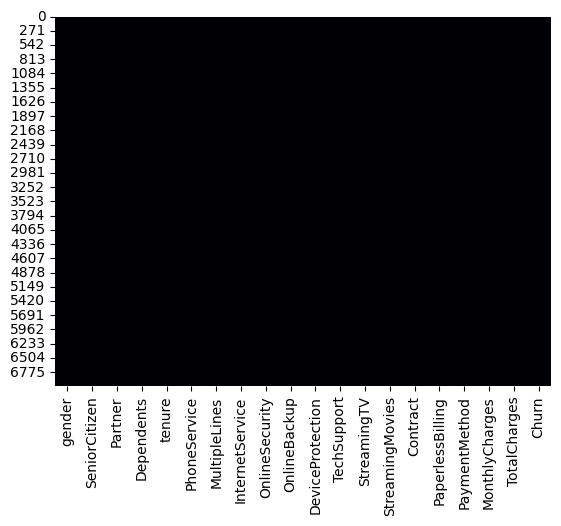

In [34]:
sns.heatmap(data.isnull(), cmap = 'magma', cbar = False)

In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f
tenure,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f
MonthlyCharges,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f
TotalCharges,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f,:.2f


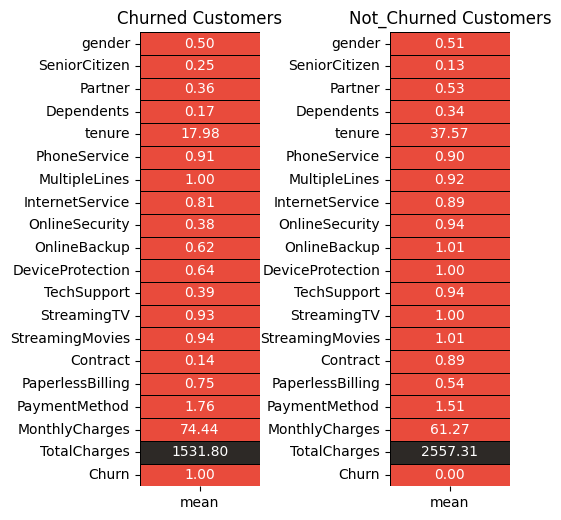

In [36]:
colors = ['#E94B3C','#2D2926']

churn = df1[df1['Churn'] == 1].describe().T
not_churn = df1[df1['Churn'] == 0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Churned Customers');

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Not_Churned Customers');

fig.tight_layout(pad = 0)

Result

1. **Mean** values of all the feature for churned and not churned customers.

2. clearly, the customer that churned had a low mean **tenure** of 17.98 months as compared to those who continued with an **tenure** period of 35.57 month.

3. mean value of **OnlinSecurity, Onlinebackup, deviceprotection** and TechSupport are higher for not -churned customers than churn custmoers

4. churned customer's **contract** value is much smaller , 74.44 is more than that of non-churned , 61.27.

5. Not-churned customers **TotlCharged **, 2557.1, is higher than churned customers, 1531.80.

6. From these men value , we can say that some of the feature display a clear cut differenv that can to focus churned cus.. to make they retain the service.


**Exploratory data Analysis**

In [37]:
col = list(df1.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn
Numerical Features : tenure MonthlyCharges TotalCharges


1. Here, categorical features are defined if the the attribute has less than 6 unique elements else it is a numerical feature.

2. Typical approach for this division of features can also be based on the datatypes of the elements of the respective attribute.
Eg : datatype = integer, attribute = numerical feature ; datatype = string, attribute = categorical feature

3. For this dataset, as the number of features are less, we can manually check the dataset as well.

*targets variable visulisation(Churn):*

TypeError: countplot() got multiple values for argument 'data'

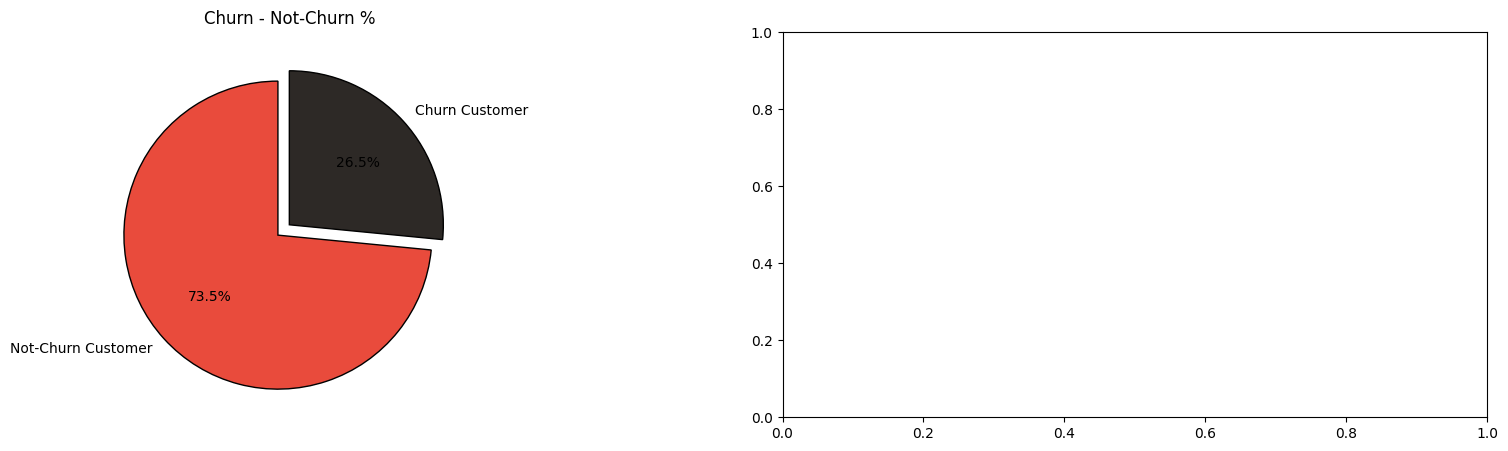

In [39]:
l = list(df1['Churn'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['Not-Churn Customer','Churn Customer'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Churn - Not-Churn %');

plt.subplot(1,2,2)
ax = sns.countplot('Churn',data = data,palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Not-Churn Customers','Churn Customers'])

plt.title('Number of Churn - Not-Churn Customers');
plt.show()

Conclusion
1. the dataset is unbalanced in near about 3 : 1 ratio for Not-Churn: Churn customers!.

2. Due to this, Prediction will be biased towards Not-Churn customers.

3. Vusualization will also display this bias!.

**categorical feature vs target variable(Churn):**

* We will remove Churn, target variable, from the categorical features list for visualization purposes.

In [40]:
l1 = ['gender','SeniorCitizen','Partner','Dependents'] # Customer Information
l2 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] # Services Signed Up for!
l3 = ['Contract','PaperlessBilling','PaymentMethod'] # Payment Information

* we have too many categorical features in thsi datasets!
* We divide them into 3 grps dependng on their values or based on the column name!

Group1: customer Information:
gender| SeniorCitizen| Partner| Dependents|

TypeError: countplot() got multiple values for argument 'data'

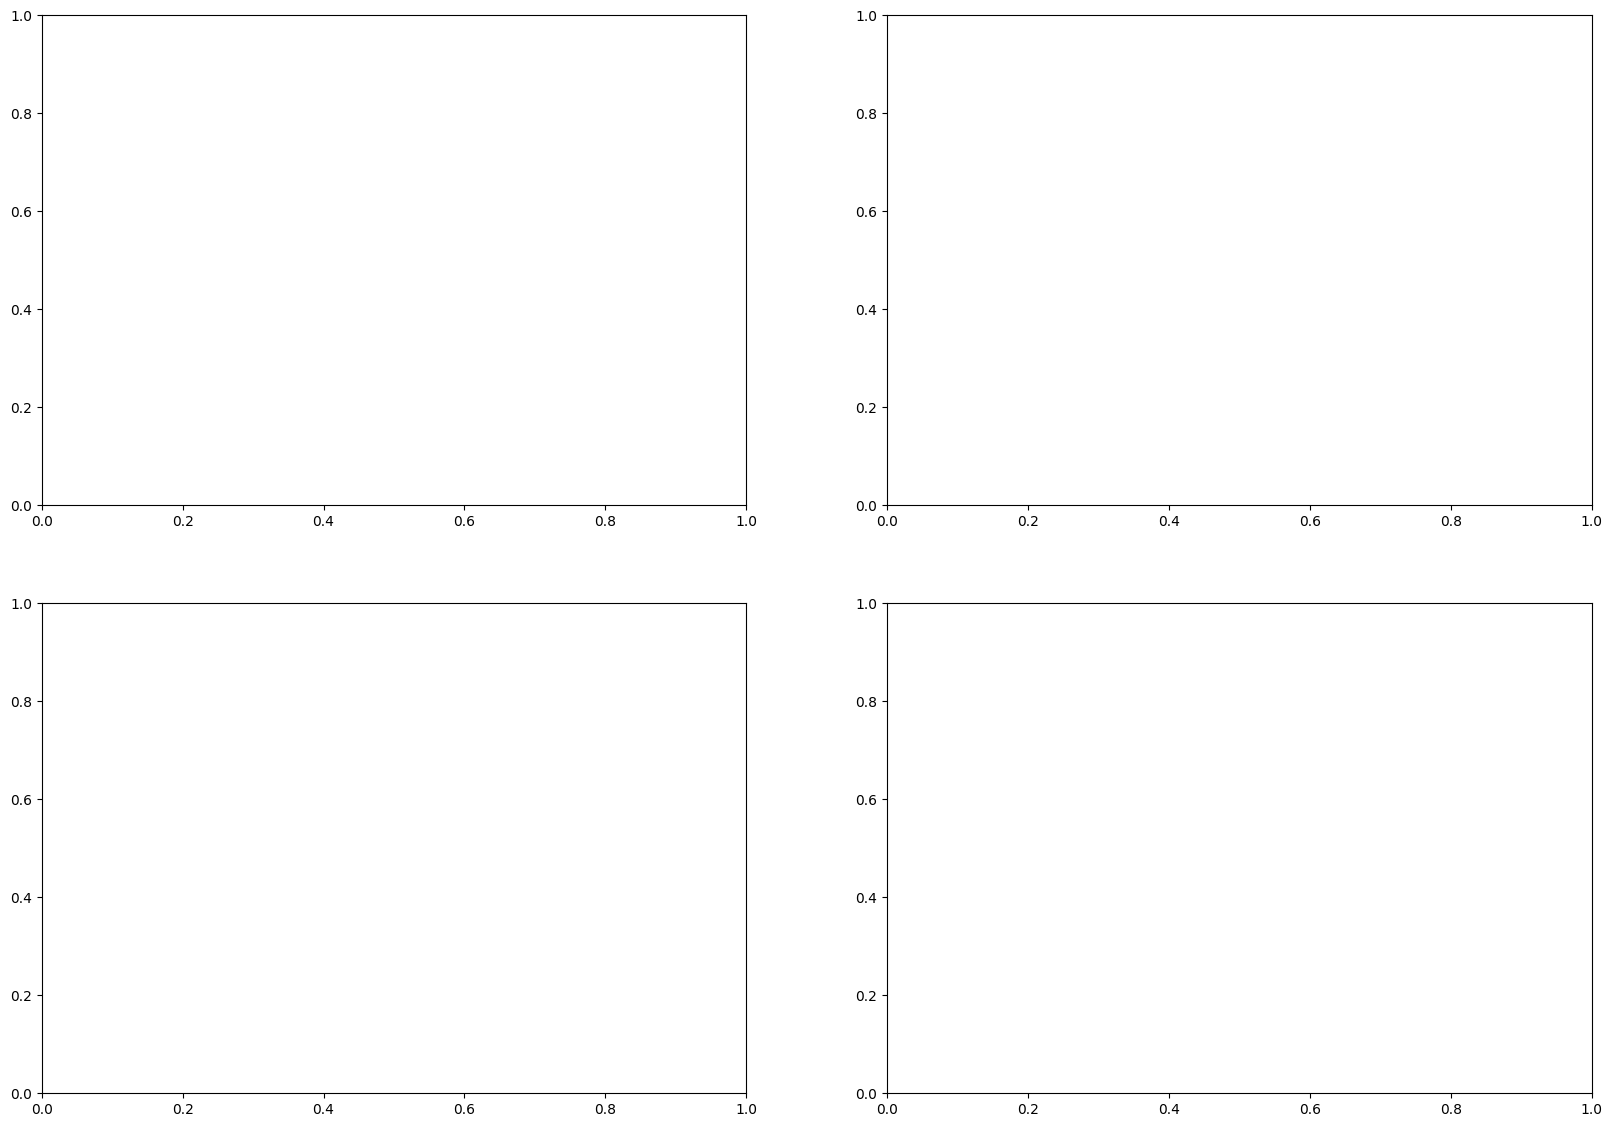

In [41]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l1)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(l1[i],data = data,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l1[i] + ' vs Churn'
    plt.title(title);

* Customer churing for male and female customer is very silima is very to each other.

* Similary, number of SeniorCitizen customer is preety low! Out of that, we can observe a near about 40% churn of SeniorCitizen customers. It accounts for a total 476 customer out of 1142 SeniorCitizen Customers.

* customers who are housing with a Partner churned less as compares to those not living with a partner.

* Similiary, churning is high for the customers tat don;t hv Dependents with them.

Group 2: Services Subscribed by the Customer :¶
For visualization purposes, we will create 2 groups!
PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies |¶

TypeError: countplot() got multiple values for argument 'data'

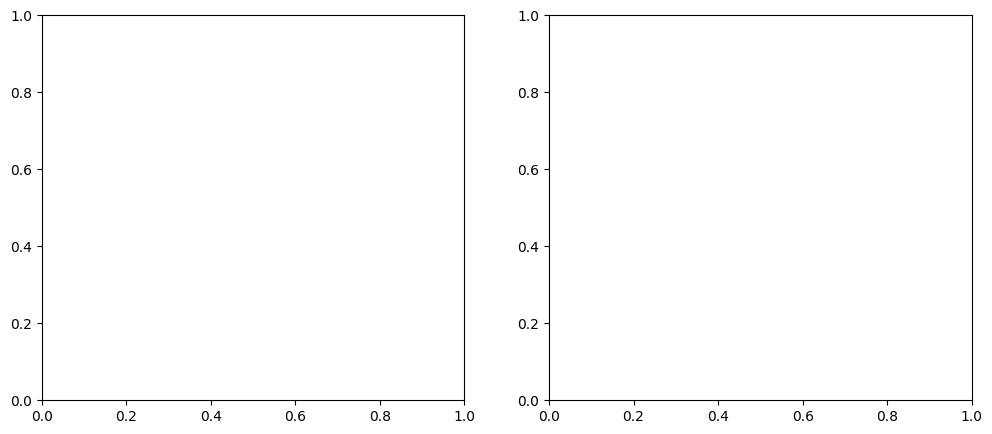

In [42]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(l2[i],data = data,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[i] + ' vs Churn'
    plt.title(title);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.countplot(l2[2],data = data,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l2[2] + ' vs Churn'
plt.title(title);

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(l2[i + 3],data = data,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[i + 3] + ' vs Churn'
    plt.title(title);